# **ROCK PAPER SCISSORS**

**Import all libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers

**Check the TensorFlow version and make sure version 2 and above.**

In [2]:
print(tf.__version__)

2.2.0


**Prepare the data**

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-01 06:18:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  19.1MB/s    in 16s     

2020-07-01 06:18:27 (19.7 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



**Extract data previously downloaded**

In [4]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

**Use split_folders to balace the data and choose the ratio to set**

In [5]:
!pip install split_folders 
import split_folders as sf
sf.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/data",seed=1337, ratio=(.8, .2))

Copying files: 2188 files [00:00, 4287.84 files/s]


**Defines directory names for training data and validation data...**

In [6]:
root_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(root_dir, 'train')
validation_dir = os.path.join(root_dir, 'val')

In [7]:
rock_dir = os.path.join('/tmp/rockpaperscissors/rock')
paper_dir = os.path.join('/tmp/rockpaperscissors/paper')
scissors_dir = os.path.join('/tmp/rockpaperscissors/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 726
total training paper images: 712
total training scissors images: 750
['FQKAKSGEI0OuRQhh.png', 'Yux1PtSfRvXafFLT.png', 'LF4yf48q3qRLLZNS.png', 'lpmH56YGWEHsmhBi.png', 'F9QovHPXetKcOokD.png', 'LlDkBm3uklZkHrB0.png', 'v7SoU8w2zc8vc7PI.png', 'QkABhOUYBbDXL7VF.png', 'rU6kbTLXKpV6ei8K.png', 'jJVH6kP3VRPHbWvs.png']
['bTurr7qf07hoPQu1.png', 'mV9vc1ITH1PrrbF8.png', '3K6a8bG8j1YTH1l0.png', '7NyxZyxSJ1gphzUE.png', '5U8st2LCr9zLl5og.png', 'HXxUlm3O2djcDgUR.png', 'cI2tl5vM2koXZPfG.png', 'xnLyw2TBZF8e2vcr.png', 'AjwddXm0ttm7Ts5J.png', 'qZX4Zcms0Ffpe8v7.png']
['VRUsuwjXjZtW1Kaj.png', 'qhd04h0tECbOylIV.png', 'Wp5WNP9Enlm4zjhx.png', 'qoU2kq8bmOjMY5e0.png', 'mAjn51U2iJwlh99P.png', 'yxCsGCXdJ0UuGEol.png', '64ktckSF0c26K6AY.png', '1xkTkvyzmavV7lQ5.png', '7zCqi454ijCrPu6H.png', 'XBP2RvuuQk5EMXsW.png']


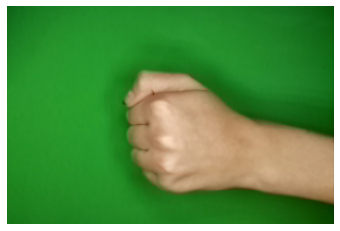

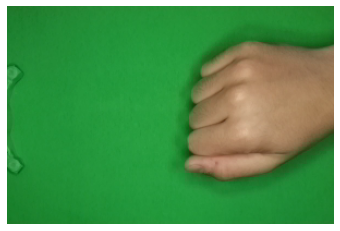

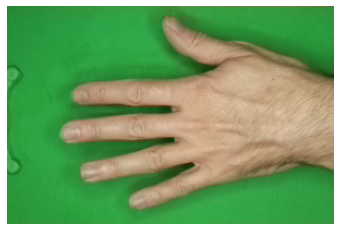

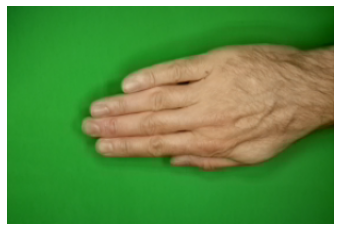

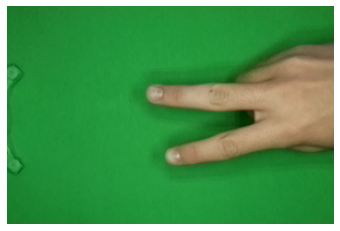

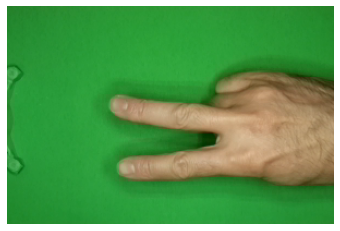

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

**Create an ImageDataGenerator object for training data and testing data.**

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='wrap',
    validation_split=0.2)
 
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='wrap',
    validation_split=0.2)

**Prepare training data that will be studied by the model**

In [10]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 pixel
        batch_size=32,
        class_mode='categorical') # terdapat masalah dengan klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 pixel
        batch_size=32, 
        class_mode='categorical') # terdapat masalah dengan klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


**Build architecture of a CNN**

In [11]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(512, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

**Returns a string that in turn can be printed**

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       2

In [13]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()

**Compile function on the model object**

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])


**Train the model using the fit method**

In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)

Epoch 1/20
25/25 [==============================] - 47s 2s/step - loss: 1.1315 - accuracy: 0.3599 - val_loss: 1.1156 - val_accuracy: 0.3438
Epoch 2/20
25/25 [==============================] - 47s 2s/step - loss: 1.3273 - accuracy: 0.4880 - val_loss: 0.8727 - val_accuracy: 0.5312
Epoch 3/20
25/25 [==============================] - 47s 2s/step - loss: 0.7881 - accuracy: 0.6350 - val_loss: 0.7840 - val_accuracy: 0.7375
Epoch 4/20
25/25 [==============================] - 48s 2s/step - loss: 0.5541 - accuracy: 0.7912 - val_loss: 0.6390 - val_accuracy: 0.7000
Epoch 5/20
25/25 [==============================] - 47s 2s/step - loss: 0.4229 - accuracy: 0.8441 - val_loss: 0.2777 - val_accuracy: 0.8875
Epoch 6/20
25/25 [==============================] - 47s 2s/step - loss: 0.3516 - accuracy: 0.8809 - val_loss: 0.2854 - val_accuracy: 0.9000
Epoch 7/20
25/25 [==============================] - 47s 2s/step - loss: 0.2460 - accuracy: 0.9175 - val_loss: 0.3886 - val_accuracy: 0.8813
Epoch 8/20
25/25 [==

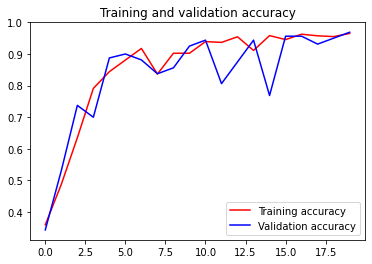

<Figure size 432x288 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [17]:
model.save("rockpaperscissors.h5")

**See the results of the model that has been made**

Saving Dcb4pD70p3oKdeIW.png to Dcb4pD70p3oKdeIW.png
Dcb4pD70p3oKdeIW.png
scissors


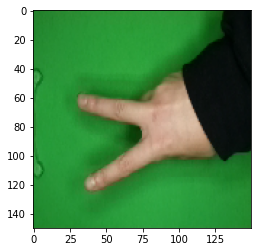

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('Nothing')

  hasil = np.argmax(classes)